<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [5]:
# Read CSV
wine_csv = 'winequality_merged.csv'
df = pd.read_csv(wine_csv)

#### 1.2 Explore Data (Exploratory Data Analysis)

In [6]:
# ANSWER
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [8]:
#check for null values
df.isnull().sum().sum()

0

/Users/lawrenceyim/opt/anaconda3/envs/hdb_mini_1/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  after removing the cwd from sys.path.


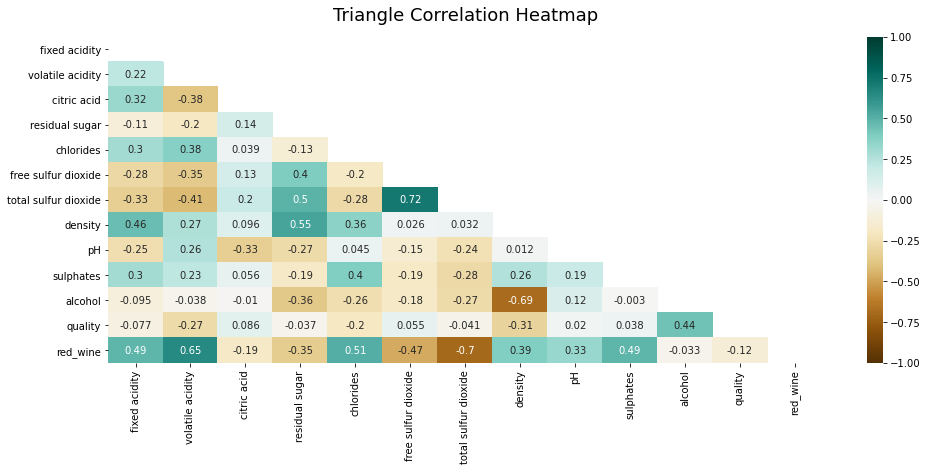

In [9]:
#check correlations
plt.figure(figsize=(16, 6))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))

heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

### 2. Set Target Variable

Create a target variable for wine quality.

In [10]:
# Target Variable
y = df[['quality']]

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [11]:
# ANSWER
X = df[["citric acid", "free sulfur dioxide", "alcohol"]]
# used forward feature selection and started by adding the feature with highest correlation "alcohol", and then subsequently added more features until the r2 did not improve even after adding more features. We ended up with the features with top 3 correation to target variable

### 4. Using Linear Regression Create a Model and Test Score

In [12]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score

In [13]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
# Create a model for Linear Regression
regr = linear_model.LinearRegression()
# Fit the model with the Training data
#regr.fit(X_train, y_train)

#reg = LinearRegression().fit(X, y)

# Calculate the score (R^2 for Regression) for Training Data
y_pred_train = regr.fit(X_train, y_train).predict(X_train)
y_pred_test = regr.fit(X_test, y_test).predict(X_test)
print('R^2 for Training Data: %.2f'
      % r2_score(y_train, y_pred_train))
# Calculate the score (R^2 for Regression) for Testing Data
y_pred_test = regr.predict(X_test)
print('R^2 for Testing Data: %.2f'
      % r2_score(y_test, y_pred_test))

R^2 for Training Data: 0.23
R^2 for Testing Data: 0.20


### BONUS: Cross validation

In [15]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [18]:
regr = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X, y)):
    # Get training and test sets for X and y 
    X_train=X.iloc[train]
    X_test=X.iloc[test]
    y_train=y.iloc[train]
    y_test=y.iloc[test]
    
    # Fit model with training set
    y_pred_train = regr.fit(X_train, y_train).predict(X_train)
    y_pred_test = regr2.fit(X_test, y_test).predict(X_test)
    # Make predictions with training and test set
    # Score R2 and RMSE on training and test sets and store in list           
    train_scores.append(r2_score(y_train, y_pred_train))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_scores.append(r2_score(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = {}
metrics_df['train_scores'] = train_scores
metrics_df['train_rmse'] = train_rmse
metrics_df['test_scores'] = test_scores
metrics_df['test_rmse'] = test_rmse
metrics_df = pd.DataFrame.from_dict(metrics_df)
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.221666,0.770339,0.222498,0.769694
std,0.003966,0.001514,0.015273,0.005954
min,0.217648,0.768400,0.201545,0.762085
25%,0.218489,0.769355,0.212589,0.767461
50%,0.220836,0.770650,0.225895,0.767917
75%,0.224300,0.770962,0.234339,0.773468
max,0.227057,0.772328,0.238122,0.777538


In [27]:
regr = linear_model.LinearRegression()
regr2 = linear_model.LinearRegression()
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True, random_state=42)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X, y)):
    # Get training and test sets for X and y 
    X_train=X.iloc[train]
    X_test=X.iloc[test]
    y_train=y.iloc[train]
    y_test=y.iloc[test]
    
    # Fit model with training set
    y_pred_train = regr.fit(X_train, y_train).predict(X_train)
    y_pred_test = regr2.fit(X_test, y_test).predict(X_test)
    # Make predictions with training and test set
    # Score R2 and RMSE on training and test sets and store in list           
    train_scores.append(r2_score(y_train, y_pred_train))
    train_rmse.append(np.sqrt(mean_squared_error(y_train,y_pred_train)))
    test_scores.append(r2_score(y_test, y_pred_test))
    test_rmse.append(np.sqrt(mean_squared_error(y_test,y_pred_test)))
# Create a metrics_df dataframe to display r2 and rmse scores
metrics_df = {}
metrics_df['train_scores'] = train_scores
metrics_df['train_rmse'] = train_rmse
metrics_df['test_scores'] = test_scores
metrics_df['test_rmse'] = test_rmse
#dflist = [train_scores,train_rmse,test_scores,test_rmse]

metrics_df = pd.DataFrame.from_dict(metrics_df)
# Describe the metrics
metrics_df.describe()

,train_scores,train_rmse,test_scores,test_rmse
count,5.000000,5.000000,5.000000,5.000000
mean,0.221666,0.770339,0.222498,0.769694
std,0.003966,0.001514,0.015273,0.005954
min,0.217648,0.768400,0.201545,0.762085
25%,0.218489,0.769355,0.212589,0.767461
50%,0.220836,0.770650,0.225895,0.767917
75%,0.224300,0.770962,0.234339,0.773468
max,0.227057,0.772328,0.238122,0.777538


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 0.2

How many feature have you selected? Can you improve your score by selecting different features?
selected 3 features through forward selection

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



